In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.preprocessing import MinMaxScaler

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
import timeit

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [6]:
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
trainingData = pd.read_csv('preprocessedTrainData.csv')
testingData = pd.read_csv('preprocessedTestData.csv')
X_train = trainingData.drop('class', axis=1)
y_train = trainingData['class']
X_test = testingData.drop('class', axis=1)
y_test = testingData['class']

In [8]:
X_train.head()

aa_000    ab_000        ac_000        ad_000  ae_000    af_000  ag_000  \
0  0.027925  0.003496  9.999998e-01  3.260000e-08     0.0  0.000000     0.0   
1  0.012036  0.003496  0.000000e+00  2.220000e-05     0.0  0.000000     0.0   
2  0.014942  0.003496  1.070000e-07  1.160000e-08     0.0  0.000000     0.0   
3  0.000004  0.000000  3.290000e-08  7.690000e-09     0.0  0.000498     0.0   
4  0.022164  0.003496  6.420000e-07  5.340000e-08     0.0  0.000000     0.0   

   ag_001  ag_002    ag_003    ...       ee_002    ee_003        ee_004  \
0     0.0     0.0  0.000000    ...     0.015918  0.013067  7.421784e-03   
1     0.0     0.0  0.000000    ...     0.005407  0.004716  3.019031e-03   
2     0.0     0.0  0.000000    ...     0.003559  0.004232  4.364196e-03   
3     0.0     0.0  0.000005    ...     0.000003  0.000001  5.970000e-07   
4     0.0     0.0  0.000000    ...     0.007981  0.006086  4.171776e-03   

         ee_005        ee_006    ee_007    ee_008    ee_009    ef_000  \
0  8.179508e-03  1.073013e-02  0.001321  0.003800  0.000000  0.000000   
1  4.272917e-03  4.228511e-03  0.000679  0.005064  0.000394  0.000000   
2  7.130884e-03  1.014768e-02  0.001321  0.004937  0.000135  0.000000   
3  7.660000e-07  3.160000e-07  0.000000  0.000000  0.000000  0.008299   
4  6.044861e-03  9.078578e-03  0.002605  0.022523  0.000320  0.000000   

     eg_000  
0  0.000000  
1  0.000000  
2  0.000000  
3  0.027923  
4  0.000000  

[5 rows x 170 columns]

In [9]:
X_test.head()

aa_000    ab_000        ac_000    ad_000  ae_000  af_000  ag_000  ag_001  \
0  0.000001  0.000000  9.390000e-09  0.000138     0.0     0.0     0.0     0.0   
1  0.000002  0.000000  3.190000e-08  0.000460     0.0     0.0     0.0     0.0   
2  0.001537  0.034483  9.950000e-08  0.001287     0.0     0.0     0.0     0.0   
3  0.001393  0.013311  4.740000e-07  0.010754     0.0     0.0     0.0     0.0   
4  0.000042  0.013311  7.320000e-08  0.001608     0.0     0.0     0.0     0.0   

   ag_002    ag_003   ...      ee_002    ee_003    ee_004    ee_005    ee_006  \
0     0.0  0.000037   ...    0.000020  0.000006  0.000008  0.000012  0.000002   
1     0.0  0.000000   ...    0.000020  0.000013  0.000033  0.000002  0.000002   
2     0.0  0.002731   ...    0.009198  0.017227  0.009057  0.004810  0.031192   
3     0.0  0.000000   ...    0.010048  0.011018  0.009945  0.008660  0.010232   
4     0.0  0.000000   ...    0.000142  0.000188  0.000380  0.000888  0.000075   

     ee_007    ee_008    ee_009  ef_000  eg_000  
0  0.000002  0.000000  0.000000     0.0     0.0  
1  0.000010  0.000000  0.000000     0.0     0.0  
2  0.003237  0.000030  0.000000     0.0     0.0  
3  0.004425  0.016389  0.000707     0.0     0.0  
4  0.000010  0.000004  0.000000     0.0     0.0  

[5 rows x 170 columns]

In [15]:
def getErrorScoreWithVariableK() :
    errorRate = []
    for i in range(1,40):
        knn = KNeighborsClassifier(n_neighbors = i, n_jobs=-1)
        knn.fit(X_train, y_train)
        prediction = knn.predict(X_test)
#     elapsedTime = timeit.default_timer() - startTime
#     print("time taken : ",elapsedTime)
        error = np.mean(prediction != y_test)
#     print('\tError rate : ',error)
        errorRate.append(error)
    plt.plot(range(1,40), errorRate, color='blue', linestyle='dashed', marker='o',
     markerfacecolor='red', markersize=12)

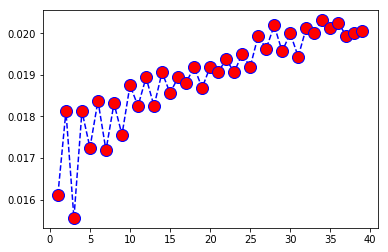

In [16]:
getErrorScoreWithVariableK()

<h3>Considering n_neighbors = 3</h3>

In [10]:
def getScoreMatrix(X_train, y_train, X_test, y_test) :
    startTime = timeit.default_timer()
    knn = KNeighborsClassifier(n_neighbors = 3, n_jobs=-1)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    elapsedTime = timeit.default_timer() - startTime
    print("time taken : ",elapsedTime)
    error = np.mean(prediction != y_test)
    print('\tError rate : ',error)
    print(confusion_matrix(y_test, prediction))
    print ('\n')
    print(classification_report(y_test, prediction))
    return error

In [29]:
datasetError = getScoreMatrix(X_train, y_train, X_test, y_test)

time taken :  40.470852734787286
	Error rate :  0.0155625
[[15594    31]
 [  218   157]]


             precision    recall  f1-score   support

        neg       0.99      1.00      0.99     15625
        pos       0.84      0.42      0.56       375

avg / total       0.98      0.98      0.98     16000



In [12]:
data = pd.concat([X_train, y_train], axis=1)

In [13]:
scoreTable = data.corr(method='pearson')

In [14]:
data.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

D:\Anaconda\lib\site-packages\matplotlib\colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


In [15]:
FeatureIndices = scoreTable.index.tolist()

In [16]:
def sortDic(UnsortedDictionary):
    dicItems = [(value,key) for key,value in UnsortedDictionary.items()]
    dicItems.sort()
    dicItems.reverse()
    dicItems = {key:value for value,key in dicItems}
    return dicItems

In [17]:
FeatureScoresForTargetVariable = {}

In [18]:
for i in FeatureIndices[:-1]:
    FeatureScoresForTargetVariable[i] = scoreTable.loc[i][FeatureIndices[-1]]

In [19]:
FeatureScoresForTargetVariable = sortDic(FeatureScoresForTargetVariable)
print(FeatureScoresForTargetVariable)

{'ef_000': 0.2821843150146296, 'ea_000': 0.21084138470561978, 'dz_000': 0.13371547976121953, 'dx_000': 0.06812698276423824, 'dr_000': 0.06138082706272214, 'de_000': 0.05775799830151383, 'cn_000': 0.03481347925181399, 'di_000': 0.03469302356357432, 'dy_000': 0.031578418553558356, 'ds_000': 0.03076035406974403, 'cm_000': 0.029521269731231065, 'dt_000': 0.02910002847782849, 'dp_000': 0.027145375072440733, 'ce_000': 0.026794448524935278, 'du_000': 0.025639196866877354, 'ci_000': 0.02408240299399129, 'ee_006': 0.02328292060020784, 'cq_000': 0.021287968960439378, 'do_000': 0.01858446297747523, 'ck_000': 0.018099527104571998, 'eb_000': 0.017503450335843412, 'cs_006': 0.016322063598549486, 'dv_000': 0.015151202184180678, 'dn_000': 0.01426212120628453, 'cn_001': 0.014158339710859993, 'cn_002': 0.013541421970930785, 'ed_000': 0.013167935378974344, 'ee_005': 0.012486686021725427, 'cj_000': 0.011953321794664145, 'dd_000': 0.011318554456047875, 'ee_004': 0.011166699044472657, 'cx_000': 0.0111285584

In [22]:
errorRate = []
#FOR CHECKING THE SCORE FOR EACH SELECTED FEATURE SUBSET
def trainTestScore(X_train, y_train, X_test, y_test):
    startTime = timeit.default_timer()
    knn = KNeighborsClassifier(n_neighbors = 3, n_jobs=-1)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    elapsedTime = timeit.default_timer() - startTime
    print("time taken : ",elapsedTime)
    error = np.mean(prediction != y_test)
    print('\tError rate : ',error)
    errorRate.append(error)
    return error

In [21]:
Features = list(FeatureScoresForTargetVariable.keys())
def selectNextBestFeature(FeatureSubset, featureIndex) :
    while featureIndex<len(Features):
        checkFeature = Features[featureIndex]
        noMatchWithAnyone = True
        if len(FeatureSubset) == 0:
            noMatchWithAnyone = True
        else:
            for feature in FeatureSubset:
                print('feature:',feature,'\tkey:',checkFeature)
                if(scoreTable.loc[str(feature)][checkFeature] >= 0.7):
                    noMatchWithAnyone = False
                    break          
        if(noMatchWithAnyone == True):
            return checkFeature, featureIndex
        featureIndex += 1

In [23]:
def scoresForFeatures(allowedError):
#     while noOfFeatures <=36:
    i = 0
    scores = []
    FinalSubset = []
    LeastError = 100
    featureIndex = -1
    noOfFeatures = 3
    while abs(LeastError - datasetError)>allowedError and featureIndex<len(Features)-1:
        while i<noOfFeatures and featureIndex<len(Features):
            Subset = FinalSubset[:]
            feature, featureIndex = selectNextBestFeature(FinalSubset, featureIndex+1 )
            Subset.append(feature)
            error = trainTestScore(X_train.loc[:,Subset], y_train, X_test.loc[:, Subset], y_test)
            if(error < LeastError):
                FinalSubset = Subset[:]
                LeastError = error
                i += 1
            print("feature subset : ",Subset, "error : ", error)
            print("\n\n\nBest feature subset : ",FinalSubset, "error : ", LeastError)
        noOfFeatures += 1
    return FinalSubset

In [24]:
bestFeatureSubset = scoresForFeatures(0.05)

time taken :  34.61017968330003
	Error rate :  0.0235
feature subset :  ['ef_000'] error :  0.0235



Best feature subset :  ['ef_000'] error :  0.0235
feature: ef_000 	key: ea_000
time taken :  33.20894576505492
	Error rate :  0.0235625
feature subset :  ['ef_000', 'ea_000'] error :  0.0235625



Best feature subset :  ['ef_000'] error :  0.0235
feature: ef_000 	key: dz_000
time taken :  33.624602702787286
	Error rate :  0.0235
feature subset :  ['ef_000', 'dz_000'] error :  0.0235



Best feature subset :  ['ef_000'] error :  0.0235
feature: ef_000 	key: dx_000
time taken :  18.99162198524874
	Error rate :  0.0245
feature subset :  ['ef_000', 'dx_000'] error :  0.0245



Best feature subset :  ['ef_000'] error :  0.0235
feature: ef_000 	key: dr_000
time taken :  22.656612897261653
	Error rate :  0.0244375
feature subset :  ['ef_000', 'dr_000'] error :  0.0244375



Best feature subset :  ['ef_000'] error :  0.0235
feature: ef_000 	key: de_000
time taken :  5.011621814582327
	Error ra

In [28]:
getScoreMatrix(X_train.loc[:,bestFeatureSubset], y_train, X_test.loc[:, bestFeatureSubset], y_test)

time taken :  23.662694310834695
	Error rate :  0.0190625
[[15604    21]
 [  284    91]]


             precision    recall  f1-score   support

        neg       0.98      1.00      0.99     15625
        pos       0.81      0.24      0.37       375

avg / total       0.98      0.98      0.98     16000



0.0190625

<h5>The algorithm selected feature subset produces same accuracy compared to whole dataset while taking only 3 out of the 117 features in whole dataset.</h5>
<h3>fature subset error: 0.0190</h3>
<h3>whole dataset error: 0.0155</h3>
<h3>feature subset time: 23.66</h3>
<h3>whole dataset time: 40.47</h3>
